In [ ]:
%pip install --upgrade torch torchvision torchaudio

In [2]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import torch

In [5]:
# Cloning yolov5

!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
# Install requirements for Yolov5

!cd yolov5 & pip install -r requirements.txt

In [2]:
# Load model

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Francisco/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-15 Python-3.8.10 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections

The yolov5 model we are using was trained on Coco dataset. It is capable of predictiong the following classes:
- https://github.com/amikelive/coco-labels/blob/master/coco-labels-2014_2017.txt 

## First example

In [9]:
# example image
img = 'https://ultralytics.com/images/zidane.jpg'

In [10]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1308.1ms pre-process, 57.4ms inference, 6.0ms NMS per image at shape (1, 3, 384, 640)


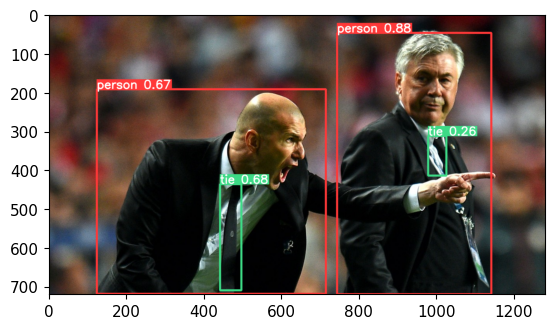

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Second example

In [12]:
traffic_img = 'https://cdn.vox-cdn.com/thumbor/0ma2o-VojU7ZmJb1yTd3Mxg-l5g=/232x0:2999x2075/1200x800/filters:focal(232x0:2999x2075)/cdn.vox-cdn.com/uploads/chorus_image/image/44219366/72499026.0.0.jpg'

In [13]:
results = model(traffic_img)
results.print()

image 1/1: 800x1200 22 cars, 2 trucks
Speed: 122.6ms pre-process, 60.0ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


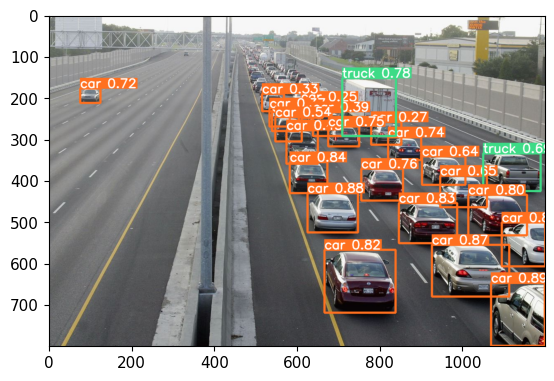

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Third Example

In [15]:
house_img = 'https://thumbor.forbes.com/thumbor/fit-in/x/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/featured-image-kitchen-layouts.jpg'

In [16]:
results = model(house_img)
results.print()

image 1/1: 539x960 1 bowl, 1 orange, 4 potted plants, 1 refrigerator, 1 vase
Speed: 125.5ms pre-process, 52.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


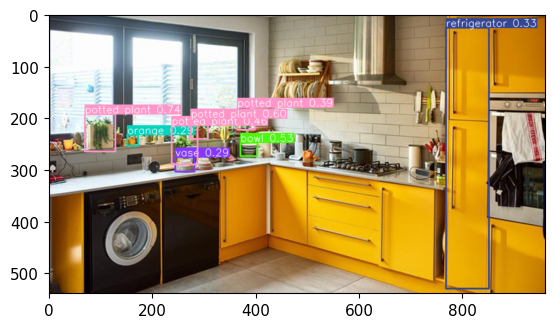

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

---

# Real Time detections

## Using webcam

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Using a Video



In [42]:
cap = cv2.VideoCapture('Test_video\\Test_Traffic_Vid.mp4')

while cap.isOpened():
    ret, frame = cap.read()

    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [3]:
import uuid # used to create a unique identifier
import os
import time

In [10]:
IMAGES_PATH = 'data/new_images/'
labels = ['awake', 'drowsy']
number_imgs = 30

In [11]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(3)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [7]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [ ]:
%pip install pyqt5 lxml --upgrade

!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data data.yaml --weights yolov5l.pt --workers 6

# Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp31//weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Francisco/.cache\torch\hub\master.zip
YOLOv5  2024-2-21 Python-3.8.10 torch-2.2.0+cpu CPU

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()